Question 1: How many books do not have an original title?

In [1]:
import pandas as pd

books_df = pd.read_csv('books.csv')

books_without_original_title = books_df['original_title'].isnull().sum()

print(f"The number of books without an original title: {books_without_original_title}")

The number of books without an original title: 36


Question 2: How many unique books are present in the dataset?

In [2]:
books_df_cleaned = books_df.dropna(subset=['original_title'])

ratings_df = pd.read_csv('ratings.csv')

merged_df = pd.merge(books_df_cleaned, ratings_df, on='book_id')

unique_books_count = merged_df['book_id'].nunique()

print(f"The number of unique books in the dataset: {unique_books_count}")

The number of unique books in the dataset: 363


Question 3: How many unique users are present in the dataset?

In [3]:
unique_users_count = ratings_df['user_id'].nunique()

print(f"The number of unique users in the dataset: {unique_users_count}")

The number of unique users in the dataset: 40836


Question 4: How many unique tags are there in the dataset?

In [4]:
book_tags_df = pd.read_csv('book_tags.csv')

unique_tags_count = book_tags_df['tag_id'].nunique()

print(f"The number of unique tags in the dataset: {unique_tags_count}")

The number of unique tags in the dataset: 3651


Question 5: Which tag_id is the most frequently used?

In [5]:
most_frequent_tag_id = book_tags_df['count'].idxmax()

print(f"The most frequently used tag_id: {book_tags_df.loc[most_frequent_tag_id, 'tag_id']}")

The most frequently used tag_id: 30574


Question 6: Which book has the most number of counts of tags given by the user?

In [6]:
most_tagged_book_id = book_tags_df['count'].idxmax()
most_tagged_book_title = books_df.loc[books_df['goodreads_book_id'] == book_tags_df.loc[most_tagged_book_id, 'goodreads_book_id'], 'original_title'].iloc[0]

print(f"The book with the most number of tag counts: {most_tagged_book_title}")

The book with the most number of tag counts: Bossypants


Question 7: Plot a bar chart with top 20 unique tags in descending order of 'user records'

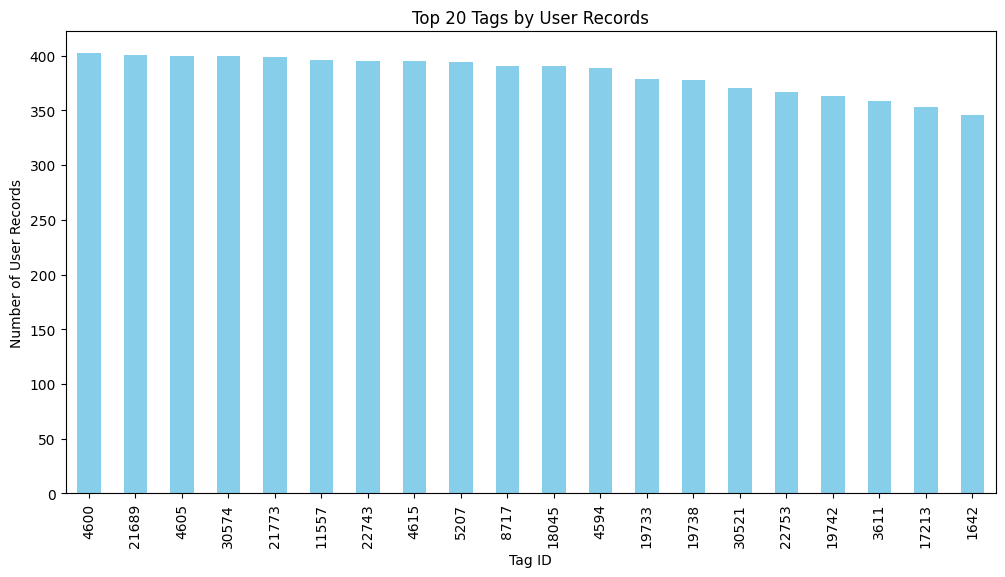

In [7]:
import matplotlib.pyplot as plt

tag_counts = book_tags_df.groupby('tag_id')['goodreads_book_id'].count()

top_20_tags = tag_counts.sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.show()